In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from pathlib import Path

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the csv files
clean_2020_data = Path("output/clean_2020.csv")
clean_2023_data = Path("output/clean_2023.csv")

In [4]:
# Create dataframes from the imported csv files
clean_2020_df = pd.read_csv(clean_2020_data)
clean_2023_df = pd.read_csv(clean_2023_data)

In [5]:
# Display the cleaned 2020 dataframe
clean_2020_df.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
0,2595,2845,2,New York City,40.75362,-73.98377,Entire home/apt,175,3,365,48
1,3831,4869,1,New York City,40.68514,-73.95976,Entire home/apt,76,1,272,349
2,5121,7356,1,New York City,40.68688,-73.95596,Private room,60,29,365,50
3,5136,7378,1,New York City,40.66120,-73.99423,Entire home/apt,175,7,352,1
4,5178,8967,1,New York City,40.76489,-73.98493,Private room,79,2,346,473


In [6]:
# Display the cleaned 2023 dataframe
clean_2023_df.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
0,958,1169,1,San Francisco,37.77028,-122.43317,Entire home/apt,202,2,128,383
1,5858,8904,1,San Francisco,37.74474,-122.42089,Entire home/apt,235,30,365,111
2,8142,21994,13,San Francisco,37.76555,-122.45213,Private room,56,32,365,9
3,8339,24215,2,San Francisco,37.77564,-122.43642,Entire home/apt,575,9,365,28
4,8739,7149,2,San Francisco,37.76030,-122.42197,Private room,110,1,159,770


## Create data frames based on city for each year

In [9]:
#Create a data frame for San Franciso 2020
sanfran_2020=clean_2020_df[clean_2020_df["City"]=="San Francisco"]

#Display sample data
sanfran_2020.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
25648,958,1169,1,San Francisco,37.76931,-122.43386,Entire home/apt,136,2,220,259
25649,5858,8904,1,San Francisco,37.74511,-122.42102,Entire home/apt,235,30,365,111
25650,7918,21994,9,San Francisco,37.76555,-122.45213,Private room,56,32,365,19
25651,8142,21994,9,San Francisco,37.76555,-122.45213,Private room,56,32,365,8
25652,8339,24215,2,San Francisco,37.77525,-122.43637,Entire home/apt,756,5,365,28


In [10]:
#Create a data frame for San Franciso 2023
sanfran_2023=clean_2023_df[clean_2023_df["City"]=="San Francisco"]

#Display sample data
sanfran_2023.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
0,958,1169,1,San Francisco,37.77028,-122.43317,Entire home/apt,202,2,128,383
1,5858,8904,1,San Francisco,37.74474,-122.42089,Entire home/apt,235,30,365,111
2,8142,21994,13,San Francisco,37.76555,-122.45213,Private room,56,32,365,9
3,8339,24215,2,San Francisco,37.77564,-122.43642,Entire home/apt,575,9,365,28
4,8739,7149,2,San Francisco,37.76030,-122.42197,Private room,110,1,159,770


In [11]:
#Create a data frame for New York City 2020
nyc_2020=clean_2020_df[clean_2020_df["City"]=="New York City"]

#Display sample data
nyc_2020.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
0,2595,2845,2,New York City,40.75362,-73.98377,Entire home/apt,175,3,365,48
1,3831,4869,1,New York City,40.68514,-73.95976,Entire home/apt,76,1,272,349
2,5121,7356,1,New York City,40.68688,-73.95596,Private room,60,29,365,50
3,5136,7378,1,New York City,40.66120,-73.99423,Entire home/apt,175,7,352,1
4,5178,8967,1,New York City,40.76489,-73.98493,Private room,79,2,346,473


In [12]:
#Create a data frame for New York City 2023
nyc_2023=clean_2023_df[clean_2023_df["City"]=="New York City"]

#Display sample data
nyc_2023.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
5967,2595,2845,3,New York City,40.75356,-73.98559,Entire home/apt,150,30,314,49
5968,5121,7356,2,New York City,40.68535,-73.95512,Private room,60,30,365,50
5969,5178,8967,1,New York City,40.76457,-73.98317,Private room,68,2,106,575
5970,5136,7378,1,New York City,40.66265,-73.99454,Entire home/apt,275,60,181,3
5971,29628,127608,1,New York City,40.68292,-73.96381,Private room,93,3,145,350


In [13]:
#Create a data frame for Twin Cities 2020
twincities_2020=clean_2020_df[clean_2020_df["City"]=="Twin Cities MSA"]

#Display sample data
twincities_2020.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
31086,2441,2680,2,Twin Cities MSA,45.00886,-93.23407,Entire home/apt,85,1,4,234
31087,4534,5811,1,Twin Cities MSA,44.94566,-93.35721,Private room,54,2,363,166
31088,27319,117283,2,Twin Cities MSA,44.91878,-93.23038,Private room,50,2,342,174
31089,55089,238546,2,Twin Cities MSA,44.91985,-93.35141,Entire home/apt,150,2,304,32
31090,60977,294621,1,Twin Cities MSA,44.94800,-93.19037,Entire home/apt,65,3,311,20


In [14]:
#Create a data frame for Twin Cities 2023
twincities_2023=clean_2023_df[clean_2023_df["City"]=="Twin Cities MSA"]

#Display sample data
twincities_2023.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
34908,2441,2680,2,Twin Cities MSA,45.00862,-93.23424,Entire home/apt,91,28,24,298
34909,4534,5811,2,Twin Cities MSA,44.94566,-93.35721,Private room,58,2,350,209
34910,27319,117283,2,Twin Cities MSA,44.92016,-93.22899,Private room,64,2,356,181
34911,82439,117283,2,Twin Cities MSA,44.91995,-93.23011,Private room,64,2,356,49
34912,101034,529956,4,Twin Cities MSA,44.98712,-93.25188,Entire home/apt,167,30,120,112


## Calculate the r-values

In [ ]:
# # Define a function to calculate the correlation between variables
# def correlation(x_values, y_values):
#     correlation=st.pearsonr(x_values,y_values)
#     print(f' The correlation between both factors is {round(correlation[0],2)}')

## Scatterplots & Linear Regressions

In [21]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values,x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    print(f"The r-value is: {rvalue}")
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values, regress_values, "r-")
    plt.show()

The r-value is: 0.018238097581591423


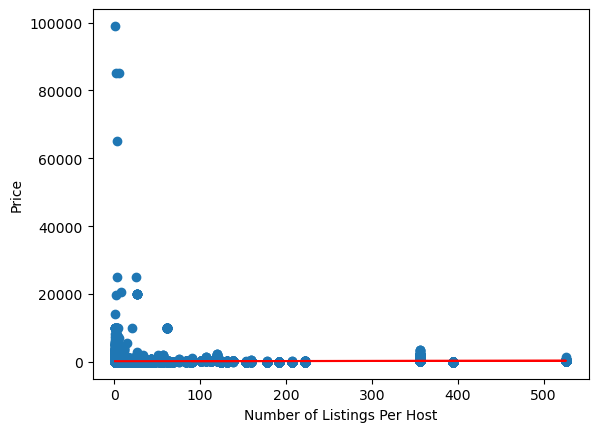

In [22]:
#Compare Price vs. # of Host Listings in all Cities 2023
lin_reg_plot(clean_2023_df["Number of Listings Per Host"],clean_2023_df["Price"],
"Number of Listings Per Host", "Price")

The r-value is: -0.018121647393782383


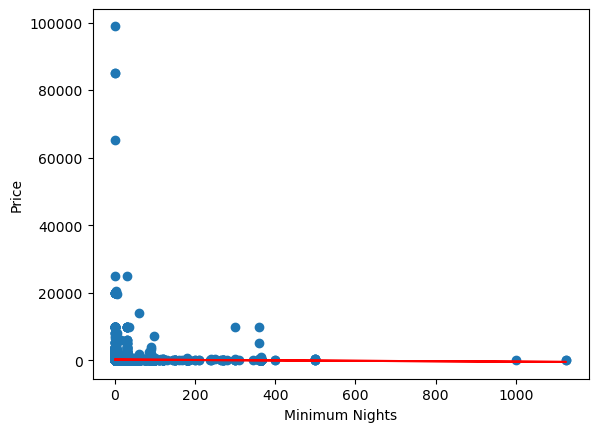

In [23]:
#Compare Price vs. Minimum Night Stays in all Cities 2023
lin_reg_plot(clean_2023_df["Minimum Nights"],clean_2023_df["Price"],
"Minimum Nights", "Price")

The r-value is: 0.012990516642871052


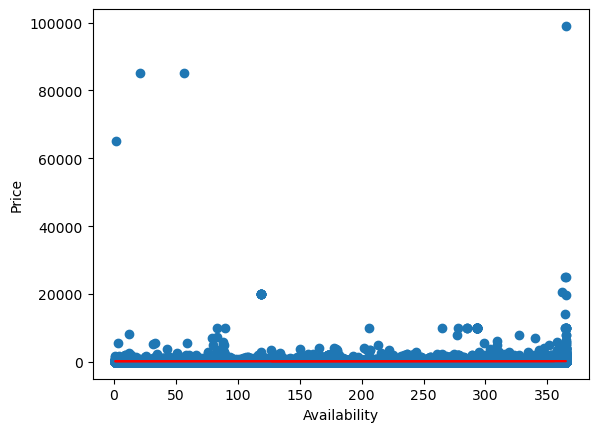

In [24]:
#Compare Price vs. Availability 2023
lin_reg_plot(clean_2023_df["Availability"],clean_2023_df["Price"],
"Availability", "Price")

The r-value is: -0.029284478966748677


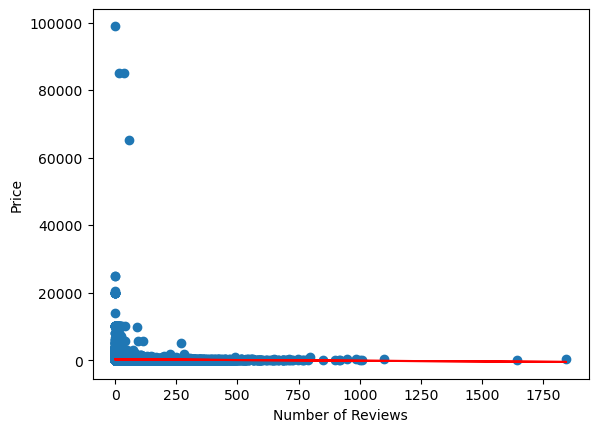

In [25]:
#Compare Price vs. # of Reviews 2023
lin_reg_plot(clean_2023_df["Number of Reviews"],clean_2023_df["Price"],
"Number of Reviews", "Price")